In [1]:
# General libraries
import re, string
import pandas as pd

In [2]:
#Reading Dataset
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
#Data Preparation
df.describe()
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [5]:
# Scikit-learn importings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

In [6]:
def get_stopwords_list(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

In [7]:
def clean_text(text):
    """Document cleaning"""
    
    # Lowering text
    text = text.lower()
    
    # Removing punctuation
    text = "".join([c for c in text if c not in PUNCTUATION])
    
    # Removing whitespace and newlines
    text = re.sub('\s+',' ',text)
    
    return text

In [8]:
def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [9]:
def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform([doc])
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,TOP_K_KEYWORDS)
    
    return list(keywords.keys())

In [10]:
# Constants
PUNCTUATION = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""" 
TOP_K_KEYWORDS = 5 # top k number of keywords to retrieve in a ranked document
STOPWORD_PATH = "stopwords.txt"

In [11]:
df.dropna(subset=['Review Text'], inplace=True)

In [12]:
df['Review Text'] = df['Review Text'].apply(clean_text)

In [13]:
df.Title = df.Title.fillna('')
df['Title'] = df['Title'].apply(clean_text)

In [14]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,absolutely wonderful silky and sexy and comfor...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,love this dress its sooo pretty i happened to ...,5,1,4,General,Dresses,Dresses
2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,my favorite buy,i love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants
4,847,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [15]:
#corpora = df[df['Clothing ID']==1078]['Review Text'].to_list()
corpora = df['Title']+' '+df['Review Text'].to_list()
print(len(corpora))

22641


In [16]:
#load a set of stop words
my_stop_words=get_stopwords_list(STOPWORD_PATH)
#my_stop_words = text.ENGLISH_STOP_WORDS.union(["im","and","on"])
# Initializing TF-IDF Vectorizer with stopwords
vectorizer = TfidfVectorizer( stop_words=my_stop_words,smooth_idf=True, use_idf=True, ngram_range=(2,2))

# Creating vocab with our corpora
# Exlcluding first 10 docs for testing purpose
vectorizer.fit_transform(corpora[::])

# Storing vocab
feature_names = vectorizer.get_feature_names()

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['come', 'vis', 'viser', 'visest'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [17]:
df['Full text']=df['Title']+' '+df['Review Text']

In [18]:
print(df.head())

   Clothing ID  Age                    Title  \
0          767   33                            
1         1080   34                            
2         1077   60  some major design flaws   
3         1049   50          my favorite buy   
4          847   47         flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  absolutely wonderful silky and sexy and comfor...       4                1   
1  love this dress its sooo pretty i happened to ...       5                1   
2  i had such high hopes for this dress and reall...       3                0   
3  i love love love this jumpsuit its fun flirty ...       5                1   
4  this shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2    

In [19]:
df['keywords'] = df['Full text'].apply(lambda x: get_keywords(vectorizer, feature_names, x))

In [20]:
#Fetching list of keywords for clothing ID 1078
from functools import reduce
single_list = list(map(lambda x: x.lower(),reduce(lambda x,y: x+y, df[df['Clothing ID']==1078]['keywords'].tolist())))
print(single_list)

['worked standing', 'straps stay', 'stay weird', 'standing minute', 'minute sat', 'wellmade design', 'well difficult', 'wear italy', 'summer dresses', 'just book', 'size tie', 'quality linen', 'nice 51', 'knees found', 'front adjusted', 'wear tightsboots', 'tightsboots booties', 'options accessorize', 'clingy grey', 'booties color', 'weight problem', 'wasnt worse', 'solved ironing', 'rolling took', 'returned figured', 'youthful dont', 'xs pattern', 'spring reviews', 'seasons fall', 'knees isnt', 'wear choice', 'choice day', 'day evening', 'flattering easy', 'dress extremely', 'xl greyredyellow', 'works return', 'wearing saw', 'taller models', 'stripes placed', 'younger who', 'shorter younger', 'short husband', 'pull short', 'only 56', 'hand dress', 'comfortable aesthetics', 'comfort hand', 'aesthetics comfort', 'hand hand', 'weird fun', 'tentlike waist', 'fine bit', 'drew sure', 'concept fits', 'versatile compliments', 'comfortable versatile', 'dress comfortable', 'love dress', 'wayyy 

In [21]:
#Fetching unique keyword from list of keywords for clothing ID 1078 and creating dictionary of keywords with their frequency
import numpy as np

res = list(zip(*np.unique(single_list, return_counts=True)))
resDict={}
for j in res:
    resDict.update({j[0]:j[1]})
print(resDict)

{'0p 51': 1, '0p am': 1, '0p small': 1, '105 lbs': 1, '110 guess': 1, '115lbs fit': 1, '118lbs went': 1, '120 4p': 1, '125lb fits': 1, '125lbs looser': 1, '135lbs 34b': 1, '138lbs fits': 1, '14 absolutely': 1, '14 nice': 1, '140 wore': 1, '1416 dress': 1, '155lbs medium': 1, '26 51': 1, '26 waist': 1, '2p tight': 1, '32c purchased': 1, '34 26': 1, '34b 26': 1, '34d body': 1, '34dd medium': 1, '36 dd': 1, '36 hips': 1, '383040 34dd': 1, '38c 810': 1, '46 looked': 1, '4p perfect': 1, '511 ordered': 1, '511 plan': 1, '52 116ibs': 1, '52 fits': 1, '52 worked': 1, '52105 lbs': 1, '53 138lbs': 1, '53 curvy': 1, '53 went': 1, '54 155': 1, '54 thinking': 1, '55 34d': 1, '55 looking': 1, '55 purplish': 1, '58 138': 1, '58 155lbs': 1, '58 solid': 1, '59 model': 1, '5ft fits': 1, 'absolute perfection': 1, 'absolutely elegant': 1, 'accessorizes casual': 1, 'accident meant': 1, 'accommodate pretty': 1, 'accurate shown': 1, 'accurately dress': 1, 'across bust': 1, 'actually isnt': 1, 'actually red':

In [22]:
#sorting Dictionary to get most frequent keywords on top
from operator import itemgetter
sorted(resDict.items(), key=itemgetter(1), reverse=True)

[('love dress', 6),
 ('great dress', 4),
 ('summer dress', 4),
 ('dress adorable', 3),
 ('dress dress', 3),
 ('dress just', 3),
 ('love love', 3),
 ('super flattering', 3),
 ('awesome fit', 2),
 ('beautiful unique', 2),
 ('casual dress', 2),
 ('dress comfortable', 2),
 ('dress perfect', 2),
 ('dress prettier', 2),
 ('dress super', 2),
 ('dress wear', 2),
 ('dress wonderful', 2),
 ('flattering love', 2),
 ('gorgeous dress', 2),
 ('great quality', 2),
 ('just didnt', 2),
 ('missed mark', 2),
 ('nice dress', 2),
 ('smaller normally', 2),
 ('sweater dress', 2),
 ('wearing tights', 2),
 ('0p 51', 1),
 ('0p am', 1),
 ('0p small', 1),
 ('105 lbs', 1),
 ('110 guess', 1),
 ('115lbs fit', 1),
 ('118lbs went', 1),
 ('120 4p', 1),
 ('125lb fits', 1),
 ('125lbs looser', 1),
 ('135lbs 34b', 1),
 ('138lbs fits', 1),
 ('14 absolutely', 1),
 ('14 nice', 1),
 ('140 wore', 1),
 ('1416 dress', 1),
 ('155lbs medium', 1),
 ('26 51', 1),
 ('26 waist', 1),
 ('2p tight', 1),
 ('32c purchased', 1),
 ('34 26', 1

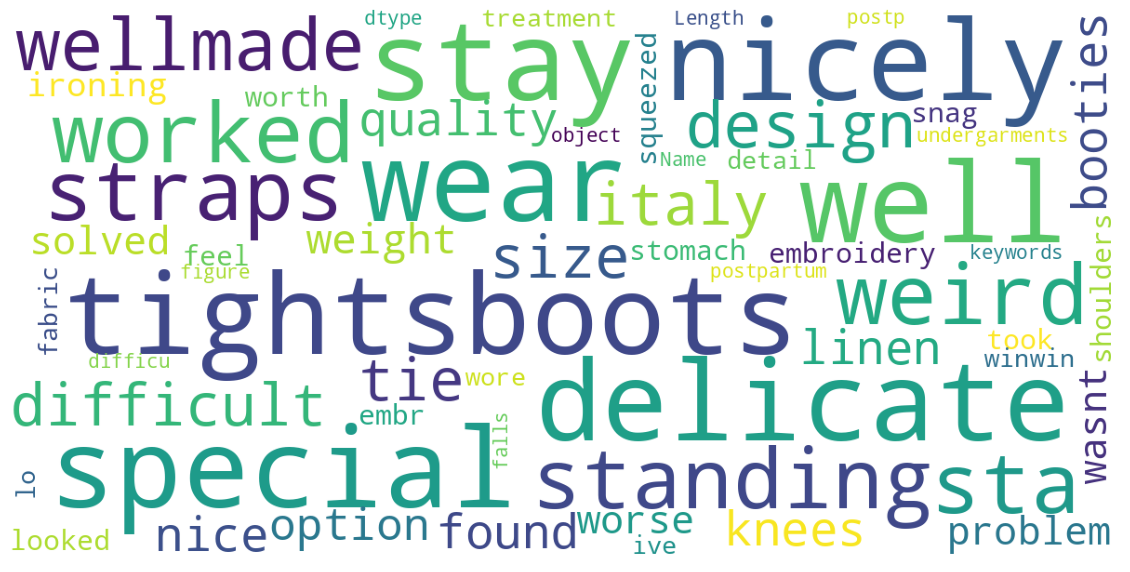

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df[df['Clothing ID']==1078]['keywords'] )


In [24]:
#writing Dataframe to Excel
df.to_excel("TF-IDF_Keywords_Output.xlsx")